In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization,UtilityFunction
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.decomposition import PCA

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Lab/ML_1615.csv")
df = data_df.copy()
df.head(2)

,department_SET,department_ASL,department_BAE,session,university_category_Public,university_category_Private,father_occupation_Businessman,father_occupation_Teacher,father_occupation_Others,father_occupation_Service Holder,...,genre_Poetry,genre_NO,genre_Other,smoke,critical_health_issues,emotional_ctrl_mental_health,SSC,HSC,CGPA,CGPA_cat
0,0,0,1,4,0,1,0,0,0,0,...,0,0,0,5,0,1,4.82,4.83,3.70,High
1,1,0,0,4,1,0,0,1,0,0,...,0,0,1,5,1,1,5.00,5.00,3.69,High


In [ ]:
columns_to_drop = ['CGPA','CGPA_cat','genre_NO']
X_df = df.drop(columns_to_drop, axis = 1)
y = df['CGPA_cat']

In [ ]:
X_df.shape

(1615, 96)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, stratify=y, test_size = 0.25, random_state = 42,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1211, 96), (404, 96), (1211,), (404,))

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train.head(2)

,department_SET,department_ASL,department_BAE,session,university_category_Public,university_category_Private,father_occupation_Businessman,father_occupation_Teacher,father_occupation_Others,father_occupation_Service Holder,...,genre_Educational,genre_Historical,genre_Comics,genre_Poetry,genre_Other,smoke,critical_health_issues,emotional_ctrl_mental_health,SSC,HSC
0,1,0,0,4,1,0,0,0,1,0,...,0,0,0,0,0,5,1,1,5.0,4.92
1,1,0,0,2,1,0,1,0,0,0,...,0,0,0,0,0,5,0,1,5.0,5.00


In [ ]:
X_test.head(2)

,department_SET,department_ASL,department_BAE,session,university_category_Public,university_category_Private,father_occupation_Businessman,father_occupation_Teacher,father_occupation_Others,father_occupation_Service Holder,...,genre_Educational,genre_Historical,genre_Comics,genre_Poetry,genre_Other,smoke,critical_health_issues,emotional_ctrl_mental_health,SSC,HSC
0,1,0,0,2,0,1,1,0,0,0,...,0,0,0,0,0,5,0,1,5.0,5.0
1,1,0,0,4,1,0,1,0,0,0,...,0,0,0,0,0,5,0,0,5.0,5.0


In [ ]:
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [ ]:
columns = ['session','family_members_cnt','study_duration_day','freq_undrst_core_concept','freq_undrst_class_lecture','final_exam_prep','test_satisfaction','class_performance',
             'attendance','sleep_duration_day','socializing_freq','freq_exercise', 'freq_extra-curricular_activity','freq_religious_practices', 'spent_sports',
             'spent_social_media','spent_online_games', 'leadership_skill','smoke','SSC', 'HSC']

X_train = Standard_Scaler (X_train, columns)
X_test = Standard_Scaler (X_test, columns)


In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train.head(2)

,department_SET,department_ASL,department_BAE,session,university_category_Public,university_category_Private,father_occupation_Businessman,father_occupation_Teacher,father_occupation_Others,father_occupation_Service Holder,...,genre_Educational,genre_Historical,genre_Comics,genre_Poetry,genre_Other,smoke,critical_health_issues,emotional_ctrl_mental_health,SSC,HSC
0,1,0,0,1.262924,1,0,0,0,1,0,...,0,0,0,0,0,0.62456,1,1,0.379765,-0.016208
1,1,0,0,-0.539552,1,0,1,0,0,0,...,0,0,0,0,0,0.62456,0,1,0.379765,0.417566


In [ ]:
# separate the scaled columns
X_train_scaled = X_train[columns]
X_test_scaled = X_test[columns]
X_train_scaled.head(2)

,session,family_members_cnt,study_duration_day,freq_undrst_core_concept,freq_undrst_class_lecture,final_exam_prep,test_satisfaction,class_performance,attendance,sleep_duration_day,...,freq_exercise,freq_extra-curricular_activity,freq_religious_practices,spent_sports,spent_social_media,spent_online_games,leadership_skill,smoke,SSC,HSC
0,1.262924,0.006665,0.956648,0.866673,-0.847225,0.359654,1.011173,1.011155,-0.209153,0.827901,...,0.837036,-0.103636,-0.724488,-0.942667,-0.9274,-2.192475,-1.436206,0.62456,0.379765,-0.016208
1,-0.539552,0.006665,2.213157,-0.391267,-0.157020,0.359654,-0.299887,-0.139339,0.420908,-1.416700,...,-0.775773,-0.103636,0.504300,-0.942667,0.2960,0.627586,0.682242,0.62456,0.379765,0.417566


In [ ]:
# separate those columns which will be used in PCA
X_train_pca = X_train.drop(columns,axis=1)
X_test_pca = X_test.drop(columns,axis=1)
X_train_pca.head(2)

,department_SET,department_ASL,department_BAE,university_category_Public,university_category_Private,father_occupation_Businessman,father_occupation_Teacher,father_occupation_Others,father_occupation_Service Holder,father_occupation_Farmer,...,genre_Non-fiction,genre_Romantic,genre_Adventure,genre_Educational,genre_Historical,genre_Comics,genre_Poetry,genre_Other,critical_health_issues,emotional_ctrl_mental_health
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_pca)
X_test_sc = scaler.transform(X_test_pca)

In [ ]:
pca = PCA(n_components=54,random_state=42)
X_train_trf = pca.fit_transform(X_train_sc)
X_test_trf = pca.transform(X_test_sc)

In [ ]:
column_names = [f'v{i}' for i in range(1, 55)]

# Store the transformed training data in a DataFrame
X_train_pca_df = pd.DataFrame(X_train_trf, columns=column_names)
X_test_pca_df = pd.DataFrame(X_test_trf, columns=column_names)

X_train_pca_df.shape,X_test_pca_df.shape

((1211, 54), (404, 54))

In [ ]:
X_train_pca_df.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54
0,0.614541,1.529779,-1.677158,2.259891,-1.108033,0.222911,-0.776765,-0.928994,-0.397583,0.204958,...,-0.776768,-1.451295,-1.051073,0.340415,-0.100674,1.140985,1.130490,-1.087457,-0.163317,0.301276
1,-0.507293,-0.983458,0.513955,0.656667,-0.821258,1.503547,0.108908,-0.146600,1.087978,0.267677,...,1.242763,-0.000964,0.371323,-0.068111,-0.423381,-1.309634,-0.303289,0.281380,0.246958,1.624858


In [ ]:
X_train_pca_df.reset_index(drop=True, inplace=True)
X_test_pca_df.reset_index(drop=True, inplace=True)
X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)

In [ ]:
X_train = pd.concat([X_train_pca_df,X_train_scaled], axis=1)
X_test = pd.concat([X_test_pca_df,X_test_scaled], axis=1)

X_train.shape,X_test.shape

((1211, 75), (404, 75))

In [ ]:
X_train.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,freq_exercise,freq_extra-curricular_activity,freq_religious_practices,spent_sports,spent_social_media,spent_online_games,leadership_skill,smoke,SSC,HSC
0,0.614541,1.529779,-1.677158,2.259891,-1.108033,0.222911,-0.776765,-0.928994,-0.397583,0.204958,...,0.837036,-0.103636,-0.724488,-0.942667,-0.9274,-2.192475,-1.436206,0.62456,0.379765,-0.016208
1,-0.507293,-0.983458,0.513955,0.656667,-0.821258,1.503547,0.108908,-0.146600,1.087978,0.267677,...,-0.775773,-0.103636,0.504300,-0.942667,0.2960,0.627586,0.682242,0.62456,0.379765,0.417566


In [ ]:
X_test.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,freq_exercise,freq_extra-curricular_activity,freq_religious_practices,spent_sports,spent_social_media,spent_online_games,leadership_skill,smoke,SSC,HSC
0,0.939523,1.690479,1.974435,2.275108,2.772930,-3.357501,0.575168,1.995880,-0.381275,-2.920912,...,2.258079,-0.101653,1.117281,0.065234,0.363097,0.585688,-0.938708,0.685583,0.3705,0.434278
1,-1.689322,-1.217362,2.429460,-0.425431,0.479139,0.238952,-1.569255,0.860111,0.117790,-0.655651,...,-0.013117,-0.101653,0.527240,-0.893117,-0.859329,0.585688,0.246411,0.685583,0.3705,0.434278


In [ ]:
X_train_org = X_train
y_train_org = y_train

## No tuning

In [ ]:
X_train = X_train_org
y_train = y_train_org

classifiers_hp = {
    'RF': RandomForestClassifier(random_state=42,n_jobs=-1),
    'SVC':SVC(random_state=42,probability=True),
    'KNN':KNN(n_neighbors = 5),
    'DT': DecisionTreeClassifier(random_state=42),
    'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R'),
    'XGBoost': XGBClassifier(random_state=42,n_jobs=-1),
    'LR': LogisticRegression(class_weight='balanced',random_state=42,n_jobs=-1),
    'MLP': MLPClassifier(solver='adam',shuffle=True)
}

data = []
class_names = ['High', 'Low', 'Medium']


for name, clf in classifiers_hp.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test



    clf.fit( X_train, y_train_hp )
    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 10}, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {name}', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("Original Data:")
performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'],ascending=False)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming you have the following variables defined:
# X_train, X_test, y_train, y_test
# classifiers_hp - your dictionary of classifiers

# Binarize the output labels for multi-class ROC computation
classes = np.unique(y_train)
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)

# Create a figure for plotting
plt.figure(figsize=(6, 4))

# Colors for plotting
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

for (name, clf), color in zip(classifiers_hp.items(), colors):
    # Encode labels for XGBoost
    if "XGBoost" in name:
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)  # Encode y_train
        y_test_encoded = le.transform(y_test)  # Encode y_test
        clf.fit(X_train, y_train_encoded)  # Fit with encoded labels
    else:
        clf.fit(X_train, y_train)  # Fit other classifiers normally

    # Get predicted probabilities or decision scores
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
        # For binary classification, reshape if necessary
        if len(y_score.shape) == 1:
            y_score = y_score.reshape(-1, 1)
    else:
        continue  # Skip classifiers without probability scores

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Always use binarized labels for roc_curve
    y_test_roc = y_test_binarized

    if n_classes > 2:
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute weighted-average ROC curve and ROC area
        fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        # roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])
        roc_auc["weighted"] = roc_auc_score(y_test_roc, y_score,multi_class='ovr',average='weighted')
        # Plot weighted-average ROC curve
        plt.plot(fpr["weighted"], tpr["weighted"],
                 label='{0} (area = {1:0.2f})'
                       ''.format(name, roc_auc["weighted"]),
                 color=color, linewidth=2)
    else:
        fpr[0], tpr[0], _ = roc_curve(y_test_binarized.ravel(), y_score[:, 1])
        roc_auc[0] = auc(fpr[0], tpr[0])
        # Plot ROC curve for binary classification
        plt.plot(fpr[0], tpr[0],
                 label='{0} (area = {1:0.2f})'
                       ''.format(name, roc_auc[0]),
                 color=color, linewidth=2)


# Plot the diagonal line representing no skill
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Tuning

In [ ]:
X_train = X_train_org
y_train = y_train_org

classifiers_hp = {
    'RF': RandomForestClassifier(random_state=42,criterion= 'entropy', max_depth= 15, n_estimators= 300,n_jobs=-1),
    'SVC': SVC(C=459.96162782800445, coef0=0.5060527266437924, gamma=0.007796185040612139,probability=True, random_state=42),
    'KNN': KNN(leaf_size=33, n_neighbors=4, p=83),
    'DT': DecisionTreeClassifier(random_state=42,max_depth=9),
    'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R',learning_rate=0.3, n_estimators=146),
    'XGBoost': XGBClassifier(random_state=42,n_jobs=-1,learning_rate= 0.4,max_depth=15, min_child_weight= 1.5601864044243652, n_estimators= 147),
    'LR': LogisticRegression(class_weight='balanced',C=16.445845403801215, intercept_scaling=16.443457513284063,max_iter=317, random_state=42, tol=8.661774840134774,n_jobs=-1),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,100,200,100,100),solver='adam',shuffle=True,max_iter=107, power_t=6.940211297351389,random_state=42)
}

data = []


for name, clf in classifiers_hp.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test



    clf.fit( X_train, y_train_hp )
    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)

performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("Original Data+ Tuned")
performance_metric_scores_df.sort_values(by = ['f1','roc_auc_score'] , ascending=False)

## RandomOverSampling + Tuning


model:  RF
Classification report: 
              precision    recall  f1-score   support

        High       0.96      0.99      0.97       373
         Low       0.50      0.50      0.50         6
      Medium       0.82      0.36      0.50        25

    accuracy                           0.95       404
   macro avg       0.76      0.62      0.66       404
weighted avg       0.94      0.95      0.94       404

Confusion Matrix:
[[370   1   2]
 [  3   3   0]
 [ 14   2   9]]


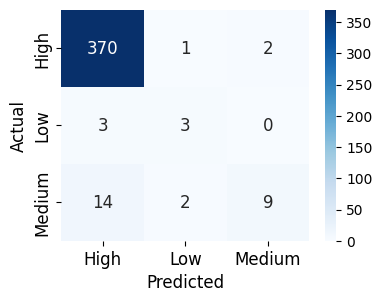

RandomSampling + Tuned


,classifier,accuracy,precision,recall,f1,roc_auc_score
0,RF,0.945545,0.940766,0.945545,0.937337,0.906839


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train_org, y_train_org)
X_train = X_over
y_train = y_over

classifiers_hp = {
    'RF': RandomForestClassifier(random_state=42,criterion= 'entropy', max_depth= 6, n_estimators= 300,n_jobs=-1,max_features=0.1,min_samples_leaf=4),
    # 'SVC': SVC(C=708.1017705382659, coef0=0.020682435846372867, gamma=0.9699128611767781,probability=True, random_state=42),
    # 'KNN':KNN(leaf_size=207, n_neighbors=1, p=14),
    # 'DT': DecisionTreeClassifier(random_state=42,max_depth=19,max_features=50, max_leaf_nodes=7),
    # 'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R',learning_rate=0.3, n_estimators=110),
    # 'XGBoost': XGBClassifier(random_state=42,n_jobs=-1, learning_rate=0.95,max_depth= 14,min_child_weight= 10.8,colsample_bytree=0.5,n_estimators= 349),
    # 'LR': LogisticRegression(C=31.119982052994235,max_iter=1000, random_state=42,n_jobs=-1),
    # 'MLP': MLPClassifier(hidden_layer_sizes=(100,100,200,100,100),solver='adam',shuffle=True,learning_rate_init=0.017595840429608954, max_iter=250,random_state=42)
}

data = []
class_names = ['High', 'Low', 'Medium']


for name, clf in classifiers_hp.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test


    clf.fit( X_train, y_train_hp )

    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    # plt.title(f'Confusion Matrix for {name}', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("RandomSampling + Tuned")
performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'],ascending=False)

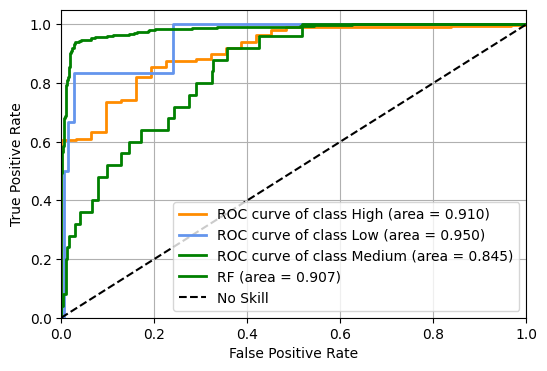

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming you have the following variables defined:
# X_train, X_test, y_train, y_test
# classifiers_hp - your dictionary of classifiers

# Binarize the output labels for multi-class ROC computation
classes = np.unique(y_train)
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)

# Create a figure for plotting
plt.figure(figsize=(6, 4))

# Colors for plotting
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

for (name, clf), color in zip(classifiers_hp.items(), colors):
    # Encode labels for XGBoost
    if "XGBoost" in name:
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)  # Encode y_train
        y_test_encoded = le.transform(y_test)  # Encode y_test
        clf.fit(X_train, y_train_encoded)  # Fit with encoded labels
    else:
        clf.fit(X_train, y_train)  # Fit other classifiers normally

    # Get predicted probabilities or decision scores
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
        # For binary classification, reshape if necessary
        if len(y_score.shape) == 1:
            y_score = y_score.reshape(-1, 1)
    else:
        continue  # Skip classifiers without probability scores

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Always use binarized labels for roc_curve
    y_test_roc = y_test_binarized

    if n_classes > 2:
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute weighted-average ROC curve and ROC area
        fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        # roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])
        roc_auc["weighted"] = roc_auc_score(y_test_roc, y_score,multi_class='ovr',average='weighted')


        for i, color in zip(range(n_classes), colors):
          plt.plot(fpr[i], tpr[i], color=color, lw=2,
                  label='ROC curve of class {0} (area = {1:0.3f})'
                        ''.format(class_names[i], roc_auc[i]))

        # Plot weighted-average ROC curve
        plt.plot(fpr["weighted"], tpr["weighted"],
                 label='{0} (area = {1:0.3f})'
                       ''.format(name, roc_auc["weighted"]),
                 color=color, linewidth=2)
    else:
        fpr[0], tpr[0], _ = roc_curve(y_test_binarized.ravel(), y_score[:, 1])
        roc_auc[0] = auc(fpr[0], tpr[0])
        # Plot ROC curve for binary classification
        plt.plot(fpr[0], tpr[0],
                 label='{0} (area = {1:0.3f})'
                       ''.format(name, roc_auc[0]),
                 color=color, linewidth=2)


# Plot the diagonal line representing no skill
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for PCA using Random ')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Smote + Tuning

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_org, y_train_org)
X_train = X_smote
y_train = y_smote

classifiers_hp = {
    'RF': RandomForestClassifier(max_depth=9, max_features=0.05, n_estimators=350, random_state=42),
    'SVC': SVC(C=207, coef0=0.36000715554672613, gamma=0.02,probability=True, random_state=42),
    'KNN': KNN(leaf_size=60, n_neighbors=1, p=1),
    'DT': DecisionTreeClassifier(random_state=42,max_depth=20,max_features=7),
    'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R',learning_rate=0.7617331680456194, n_estimators=370),
    'XGBoost': XGBClassifier(random_state=42,n_jobs=-1,learning_rate=1.0,max_depth=18,n_estimators= 366, reg_alpha=1.0, reg_lambda=10.0,min_child_weight=1.0),
    'LR': LogisticRegression(class_weight='balanced',random_state=42,intercept_scaling=4.664375391873469, max_iter=215,n_jobs=-1),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,100,100,200,100,100),solver='adam',shuffle=True,learning_rate_init=0.010582750187210768, max_iter=391,
              momentum=0.8572805912455291,random_state=42,tol=18.461588172418743)
}

data = []
class_names = ['High', 'Low', 'Medium']


for name, clf in classifiers_hp.items():

    if name == "XGBoost":
      le = LabelEncoder()
      y_train_xgb = le.fit_transform(y_train)
      y_test_xgb = le.transform(y_test)



    if name == "XGBoost":
      y_train_hp = y_train_xgb
      y_test_hp = y_test_xgb
    else:
      y_train_hp = y_train
      y_test_hp = y_test


    clf.fit( X_train, y_train_hp )

    y_pred_od_hp = clf.predict(X_test)

    print("\nmodel: ",name)
    print("Classification report: ")
    print( classification_report(y_test_hp, y_pred_od_hp) )



    accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
    precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
    recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
    f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

    y_test_prob_hp = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

    data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

    cm = confusion_matrix(y_test_hp, y_pred_od_hp)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 10}, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {name}', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
print("Smote + Tuned")
performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'],ascending=False)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.preprocessing import label_binarize
# from itertools import cycle
# import numpy as np
# from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# # Assuming you have the following variables defined:
# # X_train, X_test, y_train, y_test
# # classifiers_hp - your dictionary of classifiers

# # Binarize the output labels for multi-class ROC computation
# classes = np.unique(y_train)
# n_classes = len(classes)
# y_test_binarized = label_binarize(y_test, classes=classes)
# y_train_binarized = label_binarize(y_train, classes=classes)

# # Create a figure for plotting
# plt.figure(figsize=(6, 4))

# # Colors for plotting
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

# for (name, clf), color in zip(classifiers_hp.items(), colors):
#     # Encode labels for XGBoost
#     if "XGBoost" in name:
#         le = LabelEncoder()
#         y_train_encoded = le.fit_transform(y_train)  # Encode y_train
#         y_test_encoded = le.transform(y_test)  # Encode y_test
#         clf.fit(X_train, y_train_encoded)  # Fit with encoded labels
#     else:
#         clf.fit(X_train, y_train)  # Fit other classifiers normally

#     # Get predicted probabilities or decision scores
#     if hasattr(clf, "predict_proba"):
#         y_score = clf.predict_proba(X_test)
#     elif hasattr(clf, "decision_function"):
#         y_score = clf.decision_function(X_test)
#         # For binary classification, reshape if necessary
#         if len(y_score.shape) == 1:
#             y_score = y_score.reshape(-1, 1)
#     else:
#         continue  # Skip classifiers without probability scores

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # Always use binarized labels for roc_curve
#     y_test_roc = y_test_binarized

#     if n_classes > 2:
#         for i in range(n_classes):
#             fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
#             roc_auc[i] = auc(fpr[i], tpr[i])
#         # Compute weighted-average ROC curve and ROC area
#         fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
#         # roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])
#         roc_auc["weighted"] = roc_auc_score(y_test_roc, y_score,multi_class='ovr',average='weighted')
#         # Plot weighted-average ROC curve
#         plt.plot(fpr["weighted"], tpr["weighted"],
#                  label='{0} (area = {1:0.2f})'
#                        ''.format(name, roc_auc["weighted"]),
#                  color=color, linewidth=2)
#     else:
#         fpr[0], tpr[0], _ = roc_curve(y_test_binarized.ravel(), y_score[:, 1])
#         roc_auc[0] = auc(fpr[0], tpr[0])
#         # Plot ROC curve for binary classification
#         plt.plot(fpr[0], tpr[0],
#                  label='{0} (area = {1:0.2f})'
#                        ''.format(name, roc_auc[0]),
#                  color=color, linewidth=2)


# # Plot the diagonal line representing no skill
# plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# # Customize the plot
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Different Classifiers')
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()


## Smote + Tomek Link

In [ ]:
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import TomekLinks

# X_smote_tomek,y_smote_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),random_state=42).fit_resample(X_train_org, y_train_org)
# X_train = X_smote_tomek
# y_train = y_smote_tomek

# classifiers_hp = {
#     'RF': RandomForestClassifier(max_depth=13, max_features=0.09,min_samples_split=5, n_estimators=350, random_state=42,criterion='gini'),
#     'SVC': SVC(C=350, coef0=0.7074020320179545, gamma=0.06044423690533907,probability=True, random_state=42),
#     'KNN':KNN(leaf_size=76, n_neighbors=1, p=1),
#     'DT': DecisionTreeClassifier(max_depth=27, max_features=7, random_state=42),
#     'Ada': AdaBoostClassifier(random_state=42,algorithm='SAMME.R', n_estimators=150,learning_rate=1.5),
#     'XGBoost': XGBClassifier(random_state=42,learning_rate=0.01,n_estimators=300,max_depth=20,reg_alpha=25,n_jobs=-1),
#     'LR': LogisticRegression(C=11.757643072275192, intercept_scaling=10.65419036142312,max_iter=800, random_state=42,n_jobs=-1),
#     'MLP': MLPClassifier(hidden_layer_sizes=(100,100,200,100,100),solver='adam',shuffle=True,learning_rate='adaptive', max_iter=800,random_state=42)
#  }

# data = []


# for name, clf in classifiers_hp.items():

#     if name == "XGBoost":
#       le = LabelEncoder()
#       y_train_xgb = le.fit_transform(y_train)
#       y_test_xgb = le.transform(y_test)



#     if name == "XGBoost":
#       y_train_hp = y_train_xgb
#       y_test_hp = y_test_xgb
#     else:
#       y_train_hp = y_train
#       y_test_hp = y_test


#     clf.fit( X_train, y_train_hp )

#     if name == 'Ada':
#       fg = clf.predict(X_train)
#       print("Ada train classification report:")
#       print(classification_report(y_train_hp, fg))

#     y_pred_od_hp = clf.predict(X_test)

#     print("\nmodel: ",name)
#     print("Classification report: ")
#     print( classification_report(y_test_hp, y_pred_od_hp) )



#     accuracy = accuracy_score( y_test_hp, y_pred_od_hp )
#     precision_weighted = precision_score(y_test_hp, y_pred_od_hp,average='weighted')
#     recall_weighted = recall_score(y_test_hp, y_pred_od_hp,average='weighted')
#     f1_weighted = f1_score( y_test_hp, y_pred_od_hp, average="weighted" )

#     y_test_prob_hp = clf.predict_proba(X_test)
#     roc_auc = roc_auc_score(y_test_hp, y_test_prob_hp,multi_class='ovr',average='weighted')

#     data.append( [ name, accuracy, precision_weighted, recall_weighted, f1_weighted,roc_auc ] )

#     cm = confusion_matrix(y_test_hp, y_pred_od_hp)
#     print("Confusion Matrix:")
#     print(cm)

# performance_metric_scores_df = pd.DataFrame(data, columns=['classifier', 'accuracy', 'precision','recall', 'f1','roc_auc_score'])
# print("Smote + Tomek Link + Tuned")
# performance_metric_scores_df.sort_values(by=['f1','roc_auc_score'],ascending=False)